# Transformasi Swirl

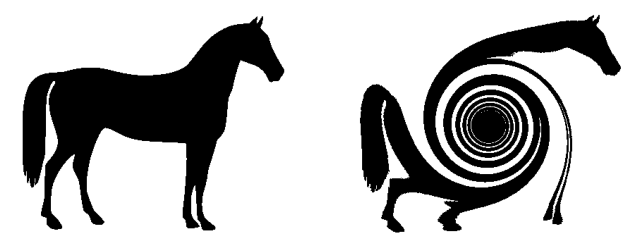

In [12]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import swirl

image = data.horse()
swirled = swirl(image, rotation=0, strength=85,
radius=180)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
figsize=(8, 3),
 sharex=True,
sharey=True)
ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')
plt.show() 

# Translation

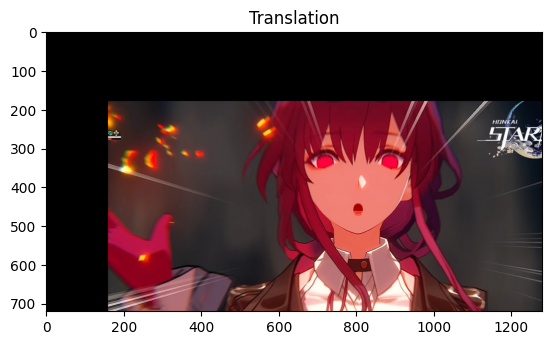

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread("kafka.jpg")
h,w = image.shape[:2]
half_height, half_width = h//4, w//8
transition_matrix = np.float32([[1, 0, half_width], [0, 1, half_height]])
img_transition = cv.warpAffine(image, transition_matrix, (w, h))
plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show() 

# Rotation

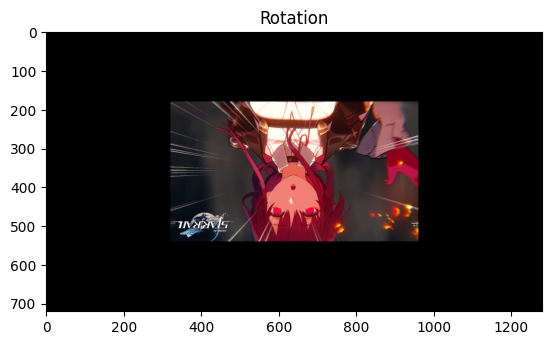

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread("kafka.jpg")
h, w = image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), -180, 0.5)
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show() 

# Interpolation

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.7 MB 1.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.7 MB 1.8 MB/s eta 0:00:01
     --------- ------------------------------ 0.4/1.7 MB 1.8 MB/s eta 0:00:01
     ------------- -------------------------- 0.6/1.7 MB 2.1 MB/s eta 0:00:01
     ---------------- ----------------------- 0.7/1.7 MB 2.2 MB/s eta 0:00:01
     ------------------- -------------------- 0.8/1.7 MB 2.2 MB/s eta 0:00:01
     ---------------------- ----------------- 1.0/1.7 MB 2.3 MB/s eta 0:00:01
     ------------------------- -------------- 1.1/1.7 MB 2.4 MB/s eta 0:00:01
     ---------------------------- ----------- 1.2/1.7 MB 2.5 MB/s eta 0:00:01
     ------------------------------- -------- 1.4/1.7 MB 2.4 MB/s eta 0


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


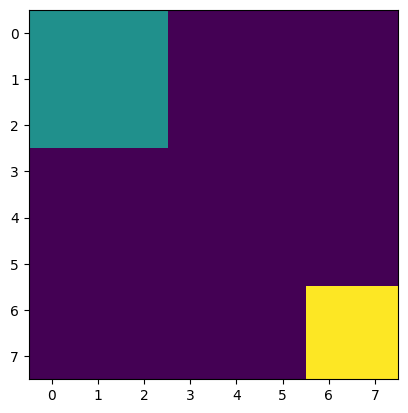

In [25]:
!pip install mahotas
import mahotas as mh
import numpy as np
from pylab import imshow, show
regions = np.zeros((8,8), bool)
regions[:3,:3] = 1
regions[6:,6:] = 1
labeled, nr_objects = mh.label(regions)
imshow(labeled, interpolation='nearest')
show() 

In [26]:
labeled,nr_objects = mh.label(regions,
np.ones((3,3), bool)) 

In [28]:
sizes = mh.labeled.labeled_size(labeled)
print('Background size', sizes[0])
print('Size of first region:{}'.format(sizes[1])) 

Background size 51
Size of first region:9


In [29]:
array = np.random.random_sample(regions.shape)
sums = mh.labeled_sum(array, labeled)
print('Sum of first region:{}'.format(sums[1])) 

Sum of first region:4.778154658889846


# Skala Interpolasi Miring

Text(0.5, 1.0, 'Skewed Interpolation Scale')

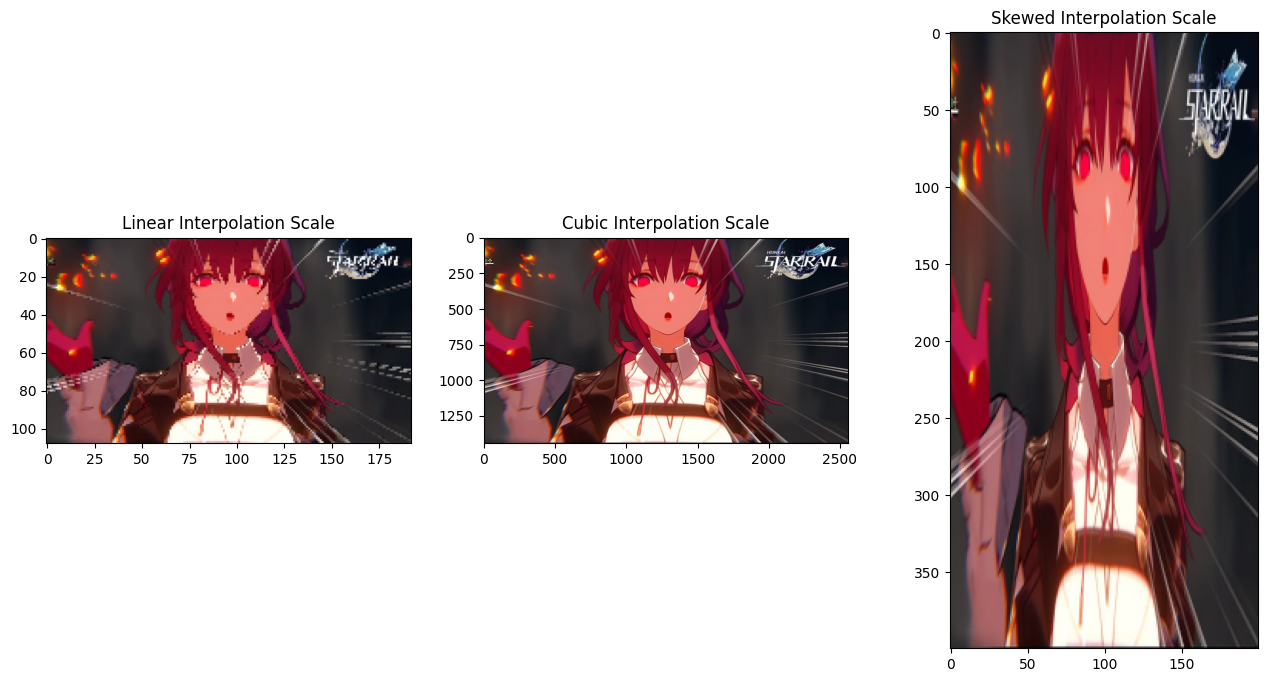

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread("kafka.jpg")
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale") 